# 小结
• 深度学习框架可以⾃动计算导数：我们⾸先将梯度附加到想要对其计算偏导数的变量上。然后我们记      
录⽬标值的计算，执⾏它的反向传播函数，并访问得到的梯度。

# 练习
1. 为什么计算⼆阶导数⽐⼀阶导数的开销要更⼤？
2. 在运⾏反向传播函数之后，⽴即再次运⾏它，看看会发⽣什么。
3. 在控制流的例⼦中，我们计算d关于a的导数，如果我们将变量a更改为随机向量或矩阵，会发⽣什么？
4. 重新设计⼀个求控制流梯度的例⼦，运⾏并分析结果。
5. 使f(x) = sin(x)，绘制f(x)和df(x)/dx 的图像，其中后者不使⽤f′(x) = cos(x)。

#1
因为计算二阶导数要在一阶导数的基础上再进行求导，开销肯定会更大。

#2
发生运行时错误，对于Pytorch来说，前向过程建立计算图，反向传播后释放。因为计算图的中间结果已经被释放了，所以第二次运行反向传播就会出错。这时在 backward 函数中加上参数 retain_graph=True，就能两次运行反向传播了。

#3
发生运行时错误，在Pytorch中，不让张量对张量求导，只允许标量对张量求导。如果想对一个非标量调用backward()，则需要传入一个gradient参数

In [7]:
#4
import torch
def f(a):
    if a.norm() > 10: #默认二范数：平方和求根号
        b = a
    else:
        b = 2 * a
    return b.sum()  #向量转标量

a = torch.tensor([1.0, 2.0, 3.0, 4.0, 5.0], requires_grad=True) #<10
d = f(a)
d.backward()
a.grad
#当 a 的范数大于10时，梯度为所有元素为 1 的向量；当 a 的梯度不大于 10 时，梯度为所有元素为 2 的向量。

tensor([2., 2., 2., 2., 2.])

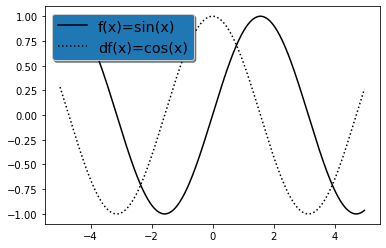

In [2]:
#5
import numpy as np
import torch
import matplotlib.pyplot as plt

# Make some fake data.
x = np.arange(-5, 5, 0.02)
f = np.sin(x)
df = []
for i in x:
	# 对于x中的每个值，都求一下导
    v = torch.tensor(i, requires_grad=True)
    y = torch.sin(v)
    y.backward()
    df.append(v.grad)

# Create plots with pre-defined labels.
fig, ax = plt.subplots()
ax.plot(x, f, 'k', label='f(x)=sin(x)')
ax.plot(x, df, 'k:', label='df(x)=cos(x)')

legend = ax.legend(loc='upper left', shadow=True, fontsize='x-large')

# Put a nicer background color on the legend.
legend.get_frame().set_facecolor('C0')

plt.show()